## Salary_hike : 
### Build a prediction model for Salary_hike.

In [83]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [84]:
data = pd.read_csv('Salary_data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [85]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [87]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [88]:
data['log_salary'] = np.log(data['Salary'])
data['sqrt_salary'] = np.sqrt(data['Salary'])
data.head()

,YearsExperience,Salary,log_salary,sqrt_salary
0,1.1,39343.0,10.580073,198.350700
1,1.3,46205.0,10.740843,214.953483
2,1.5,37731.0,10.538237,194.244691
3,2.0,43525.0,10.681091,208.626460
4,2.2,39891.0,10.593906,199.727314


Text(0.5, 1.0, 'Experience vs sqrt_salary')

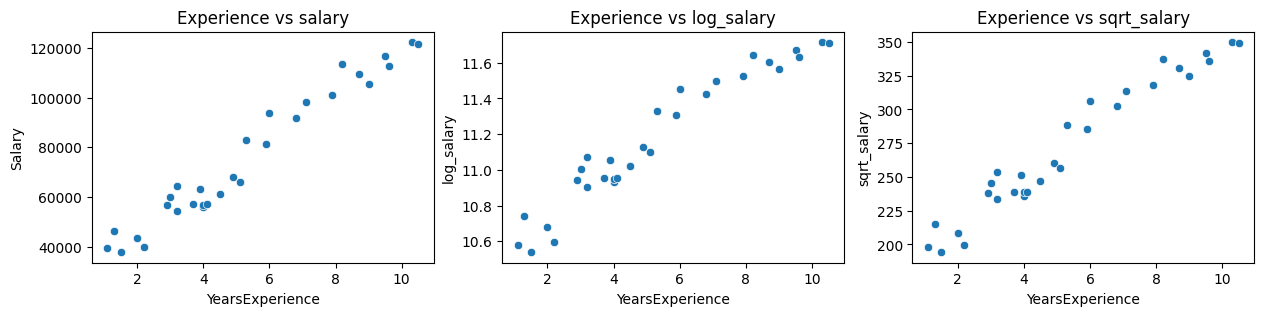

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,3))

plt.subplot(1,3,1)
sns.scatterplot(x=data['YearsExperience'],y=data['Salary'])
plt.title('Experience vs salary')

plt.subplot(1,3,2)
sns.scatterplot(x=data['YearsExperience'],y=data['log_salary'])
plt.title('Experience vs log_salary')

plt.subplot(1,3,3)
sns.scatterplot(x=data['YearsExperience'],y=data['sqrt_salary'])
plt.title('Experience vs sqrt_salary')





### model building

In [90]:
import statsmodels.formula.api as smf
model= smf.ols('Salary~YearsExperience',data=data).fit()
log_model= smf.ols('log_salary~YearsExperience',data=data).fit()
sqrt_model= smf.ols('sqrt_salary~YearsExperience',data=data).fit()


Text(0.5, 1.0, 'Experience vs sqrt_salary')

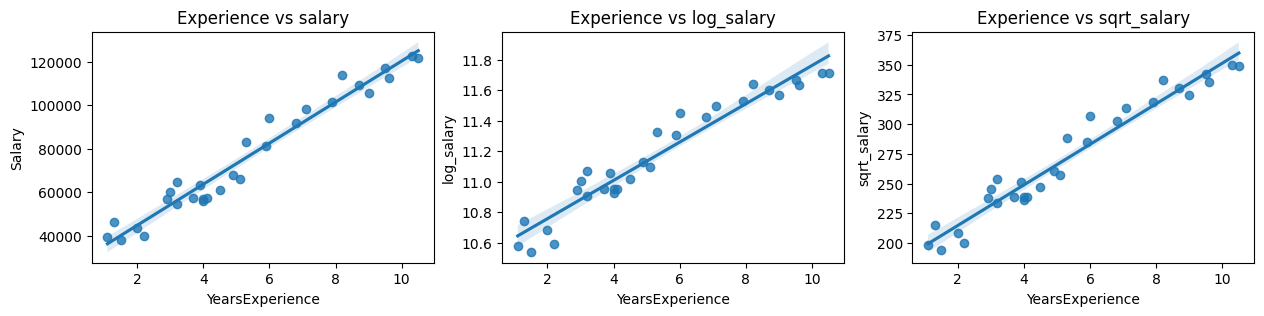

In [91]:
plt.figure(figsize=(15,3))

plt.subplot(1,3,1)
sns.regplot(x='YearsExperience',y='Salary',data=data)
plt.title('Experience vs salary')

plt.subplot(1,3,2)
sns.regplot(x='YearsExperience',y='log_salary',data=data)
plt.title('Experience vs log_salary')

plt.subplot(1,3,3)
sns.regplot(x='YearsExperience',y='sqrt_salary',data=data)
plt.title('Experience vs sqrt_salary')

In [97]:
d = {'model':['model','log_model','sqrt_model'],
'intercept':[model.params[1],log_model.params[1],sqrt_model.params[1]],
'p-values':[model.pvalues[1],log_model.pvalues[1],sqrt_model.pvalues[1]],
't-values':[model.tvalues[1],log_model.tvalues[1],sqrt_model.tvalues[1]],
'r-squared':[model.rsquared,log_model.rsquared,sqrt_model.rsquared],
'adj r-squared':[model.rsquared_adj,log_model.rsquared_adj,sqrt_model.rsquared_adj]}
new_df = pd.DataFrame(data=d)
new_df

,model,intercept,p-values,t-values,r-squared,adj r-squared
0,model,9449.962321,1.143068e-20,24.950094,0.956957,0.955419
1,log_model,0.125453,7.027439e-18,19.584833,0.931967,0.929537
2,sqrt_model,17.056532,9.782891e-20,23.025247,0.949835,0.948044
